## 2.3.3 선형 모델 (Linear model)
- 100여년 전에 개발되었고 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰임
- 입력 특성에 대한 선형 함수를 만들어 예측하는 것

In [5]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split


- 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


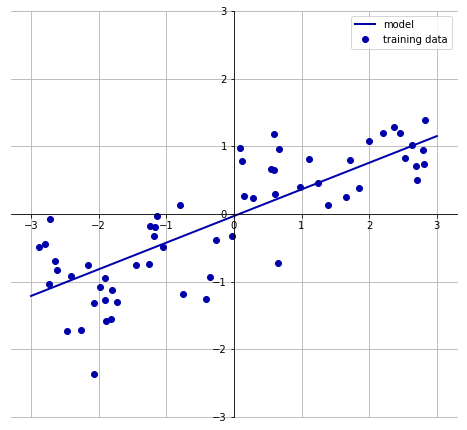

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [13]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- 릿지 회귀
    - 회귀를 위한 선형 모델로 최소적합법에서 사용한 것과 같은 예측 함수를 사용
    - 가중치 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
    - 가중치의 절댓값을 가능한 작게 만드는 것 -> 가중치의 모든 원소가 0에 가깝게 되는 것을 목표
        - 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것
        - 이런 제약을 규제라고 함 -> 과대적합이 되지 않도록 모델을 강제로 제한하는 것
        - 릿지 회귀에서 사용하는 규제 방식을 L2 규제라고 함

In [16]:
from sklearn.linear_model import Ridge

ridge =  Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
# alpha 값을 줄이게 되면 계수에 대한 제약이 풀림

Training set score: 0.79
Test set score: 0.64


In [19]:
ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


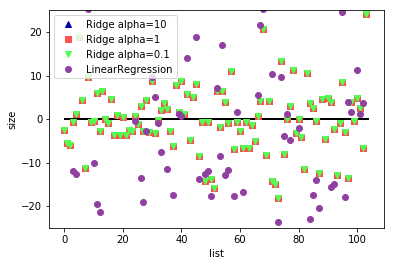

In [20]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("list")
plt.ylabel("size")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

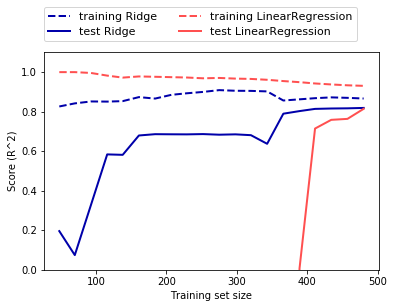

In [21]:
mglearn.plots.plot_ridge_n_samples()

- 라쏘
    - Ridge의 대안으로 Ridge와 동일하게 계수를 0에 가깝게 만드는 것이 목표
    - Ridge와 다르게 L1 규제를 사용
    - L1 규제의 결과로 어떤 계수는 0이 되기도 함 -> 모델에서 제외되는 특성이 생길 수 있음 -> 특성 선택이 자동으로 이루어지는 것과 유사

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("The number of Used feature: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
The number of Used feature: 4.00


In [24]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경과 발생
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("The number of Used feature: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
The number of Used feature: 33.00


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("The number of Used feature: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
The number of Used feature: 94.00


Text(0,0.5,'size')

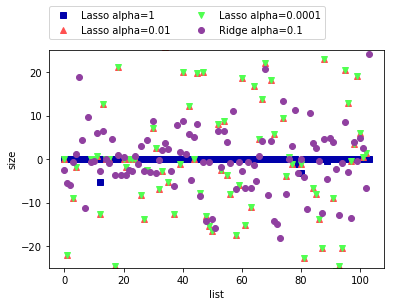

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge10.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("list")
plt.ylabel("size")

- 분류용 선형 모델
    - 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
    - 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측
    - 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수 -> 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기
    -가장 널리 알려진 두 개의 선형 분류 알고리즘은 로지스틱 회귀와 서포트 벡터 머신

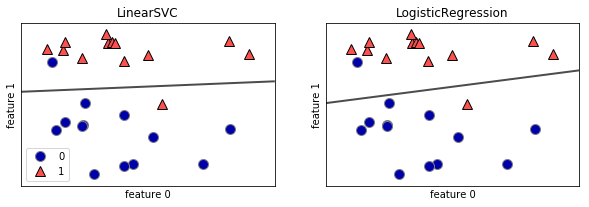

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

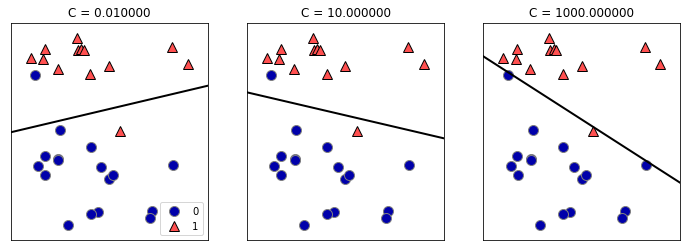

In [34]:
mglearn.plots.plot_linear_svc_regularization()

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [37]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [38]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


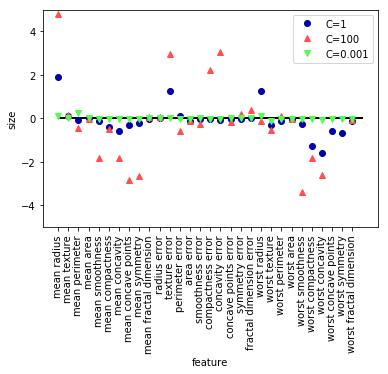

In [41]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("size")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


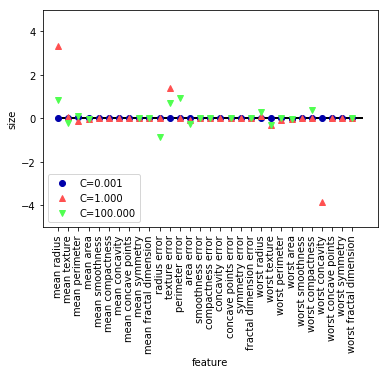

In [42]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("size")

plt.ylim(-5, 5)
plt.legend(loc=3)

- 다중 클래스 분류용 선형 모델
    - 일대다 방식으로 다중 클래스 분류가 가능
    - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
    - 클래스 수만큼 이진 분류 모델이 만들어짐

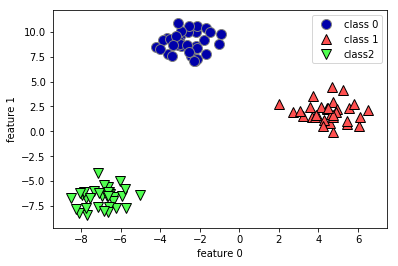

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class2"])

In [47]:
linear_svm = LinearSVC().fit(X, y)
print("x array size: ", linear_svm.coef_.shape)
print("y array size: ", linear_svm.intercept_.shape)

x array size:  (3, 2)
y array size:  (3,)


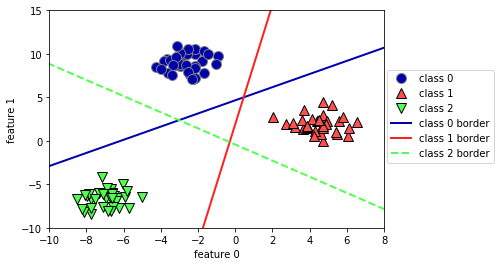

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 border', 'class 1 border', 'class 2 border'], loc=(1.01, 0.3))

Text(0,0.5,'feature 1')

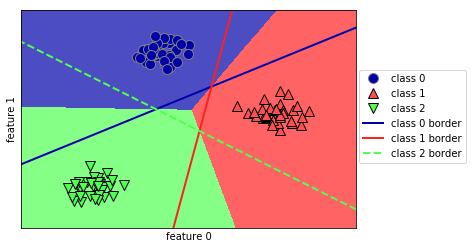

In [49]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['class 0', 'class 1', 'class 2', 'class 0 border', 'class 1 border', 'class 2 border'], loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## 장단점과 매개변수
- 선형 모델의 주요 변수
    - 회귀 모델에서는 alpha -> alpha 값이 클수록 단순
    - LinearSVC와 LogisticRegression에서는 C -> C 값이 작을수록 단순
    - 회귀 모델에서 매개변수 조정은 매우 중요
    - 보통 C와 alpha는 로그스케일로 최적치를 정함 또한 L1 규제와 L2 규제를 사용할지를 정해야 함
        - 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용
- 선형 모델의 장점 및 단점
    - 학습 속도가 빠르고 예측도 빠름
    - 매우 큰 데이터셋과 희소한 데이터셋에서 잘 동작
    - 회귀와 분류에서 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있음
        - 단, 계수의 값들이 왜 그렇게 되는 지 명확하지 않을 때가 종종 발생
        - 특히 데이터 셋의 특성들이 서로 깊게 연관되었을 때 -> 계수를 분석하기가 매우 어려울 수 있음
    - 샘플에 비해 특성이 많을 때 잘 동작
    - 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델이 많이 사용됨
    - 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음